In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
import pickle

In [4]:
from eye_quality import dataset

In [5]:
feature_gen = dataset.FeatureGenerator([], 'all_data')

Loaded kmeans model


In [6]:
x_train, x_val, y_train, y_val = \
dataset.get_dataset(eye=True, random=True, test=False, 
                    test_size=0.1, features_range=(0, 115), classes=(0,2))

Loaded kmeans model


[ WARN:0@1.318] global /home/conda/feedstock_root/build_artifacts/libopencv_1658995928149/work/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


Loaded data
35226
Loaded data


In [7]:
x_test,y_test,names_test = dataset.get_dataset(eye=False, random=False, test=True, 
                                                       test_size=0, features_range=(0, 115), 
                                               return_names=True, classes=(0, 2))

Loaded kmeans model
Loaded data


In [8]:
import xgboost as xgb

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
y_train_new = []
y_val_new = []
y_test_new = []

for y in y_train:
    if y>0: y -= 1
    y_train_new.append(y)

for y in y_val:
    if y>0: y -= 1
    y_val_new.append(y)
    
for y in y_test:
    if y>0: y -= 1
    y_test_new.append(y)
    
y_train = y_train_new
y_val = y_val_new
y_test = y_test_new

In [11]:
model = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic', seed=42, 
                          max_depth=15, n_estimators=250,
                          colsample_bytree=0.9, colsample_bylevel=0.9, 
                          reg_lambda=2, sampling_method='gradient_based')

In [18]:
%%time
model.fit(x_train+x_val, y_train+y_val)
#model.fit(x_train, y_train, sample_weight=classes_weights)

CPU times: user 2min 14s, sys: 996 ms, total: 2min 15s
Wall time: 34 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
file_name = 'xgboost_binary_prob_all.pkl'
pickle.dump(model, open(file_name, "wb"))

In [20]:
y_pred = model.predict(x_val)

In [21]:
accuracy_score(y_val, y_pred)

1.0

In [22]:
y_pred_test = model.predict(x_test)

In [23]:
accuracy_score(y_test, y_pred_test)

0.9861111111111112

In [306]:
import shap

In [307]:
explainer = shap.TreeExplainer(model)

In [308]:
names_test[70:71]

['/home/tiurin/projects/ExampleProject/Temp/DRIMDB/Good/drimdb_good (14).jpg']

In [309]:
(y_pred_test != y_test).argmax()

22

In [310]:
shap_values = explainer(x_train)
shap_values.feature_names = feature_gen.names

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


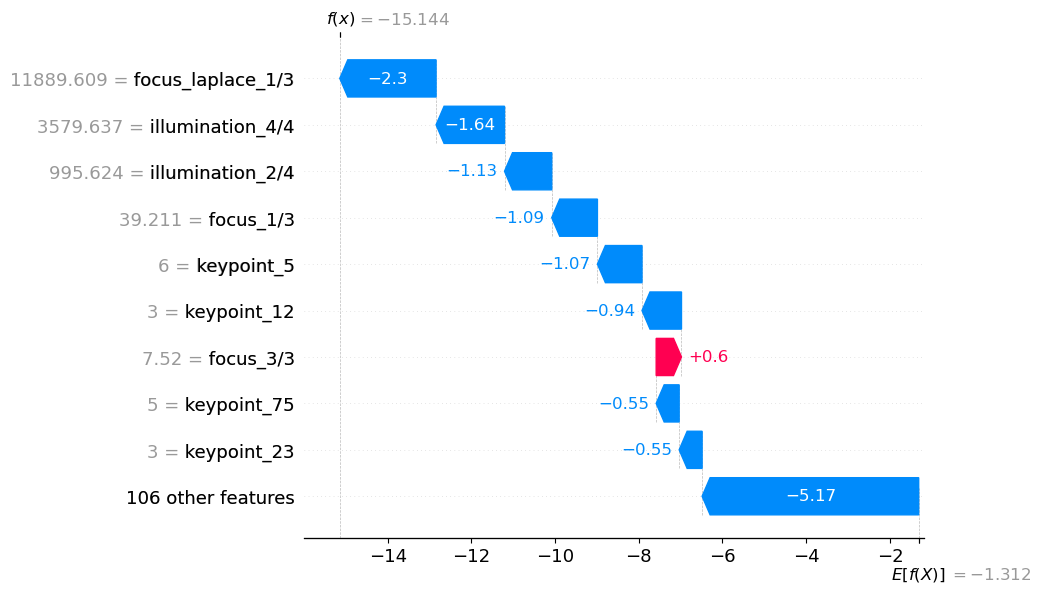

In [311]:
shap.plots.waterfall(shap_values[0], max_display=10)

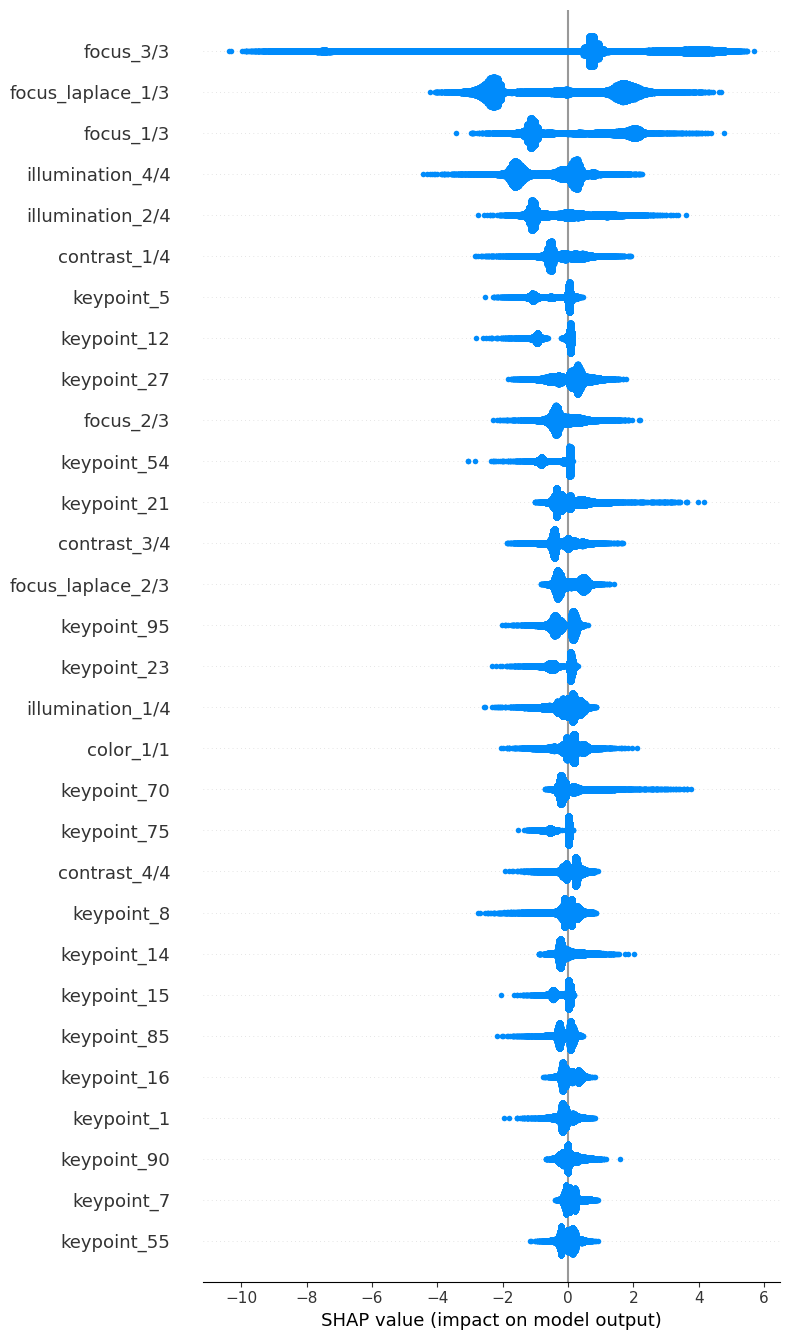

In [312]:
shap.summary_plot(shap_values, x_train, max_display=30)

In [24]:
import numpy as np

In [25]:
np.where((y_pred_test == 1) & (np.array(y_test_new) == 0))[0]

array([], dtype=int64)

In [26]:
cm = np.zeros((2, 2), dtype=int)
for i in range(len(y_pred_test)):
    cm[y_test_new[i], y_pred_test[i]] += 1

In [27]:
from matplotlib import pyplot as plt

In [28]:
import itertools

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 91   0]
 [  3 122]]


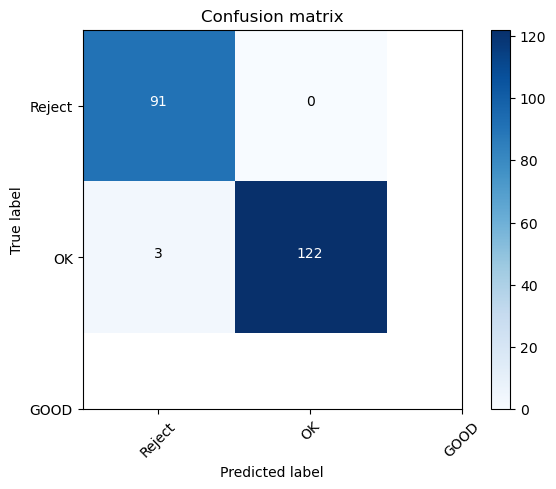

In [30]:
plot_confusion_matrix(cm, classes=['Reject', 'OK', 'GOOD'], normalize=False)

In [101]:
f = X_test[0]

In [ ]:
classifier.predict([f])

In [ ]:
classifier.feature_importances_.argmax()

In [ ]:
classifier.feature_importances_[:100].max()

In [ ]:
classifier.feature_importances_[100:].max()